In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [2]:
path = "Train"
labelFile = 'Train.csv'

In [4]:
count = 0
images = []
label = []
classes_list = os.listdir(path)
print("Total Classes Detected:",len(classes_list))
noOfClasses=len(classes_list)
print("Importing Classes.....")
for x in range (0,len(classes_list)):
    imglist = os.listdir(path+"/"+str(count))
    for y in imglist:
        img = cv2.imread(path+"/"+str(count)+"/"+y)
        img =cv2.resize(img,(32,32))
        images.append(img)
        label.append(count)
    print(count, end =" ")
    count +=1
print(" ")

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [5]:
images = np.array(images)
classNo = np.array(label)
data=np.array(images)
data= np.array(data).reshape(-1, 32, 32, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2)
Y_tests=y_test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [7]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(25093, 32, 32, 3) (25093,)
Validation(6274, 32, 32, 3) (6274,)
Test(7842, 32, 32, 3) (7842,)


In [8]:
batch_size_val=30
steps_per_epoch_val=500
epochs_val=40

In [9]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))
num_of_samples = []
cols = 3
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(30, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        if len(x_selected)==0:
            continue
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+str(row["ClassId"]))
            num_of_samples.append(len(x_selected))

data shape  (39209, 8) <class 'pandas.core.frame.DataFrame'>


[122, 1411, 1386, 917, 1266, 1200, 273, 904, 903, 943, 1261, 857, 1327, 1378, 500, 393, 277, 738, 809, 136, 220, 201, 260, 327, 182, 950, 396, 155, 339, 183, 292, 494, 151, 428, 270, 752, 259, 143, 1319, 197, 249, 157, 168]


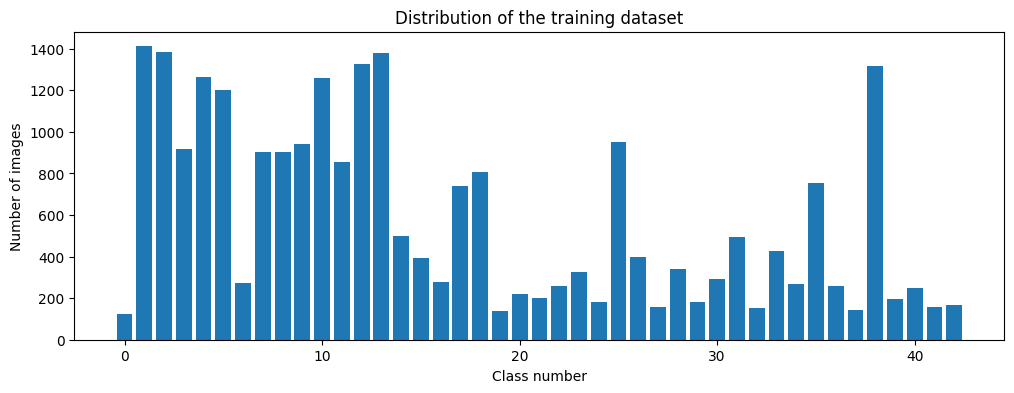

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [11]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255 # image normalization
    return img

In [12]:
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

In [13]:
X_train=X_train.reshape(-1,32,32,1)
X_validation=X_validation.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)

In [14]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,batch_size=20)
X_batch, y_batch = next(batches)

In [15]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [16]:
def seq_Model():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(32, 32, 1),
                      activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = seq_Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

In [17]:
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

Epoch 1/40
500/500 [==============================] - 130s 256ms/step - loss: 2.8337 - accuracy: 0.2246 - val_loss: 1.2408 - val_accuracy: 0.6181
Epoch 2/40
500/500 [==============================] - 129s 258ms/step - loss: 1.5179 - accuracy: 0.5407 - val_loss: 0.5012 - val_accuracy: 0.8731
Epoch 3/40
500/500 [==============================] - 128s 256ms/step - loss: 1.0386 - accuracy: 0.6851 - val_loss: 0.2506 - val_accuracy: 0.9359
Epoch 4/40
500/500 [==============================] - 130s 259ms/step - loss: 0.7718 - accuracy: 0.7617 - val_loss: 0.1657 - val_accuracy: 0.9563
Epoch 5/40
500/500 [==============================] - 129s 258ms/step - loss: 0.6447 - accuracy: 0.8024 - val_loss: 0.1344 - val_accuracy: 0.9630
Epoch 6/40
500/500 [==============================] - 128s 255ms/step - loss: 0.5401 - accuracy: 0.8292 - val_loss: 0.0963 - val_accuracy: 0.9721
Epoch 7/40
500/500 [==============================] - 127s 254ms/step - loss: 0.4811 - accuracy: 0.8488 - val_loss: 0.0844 -

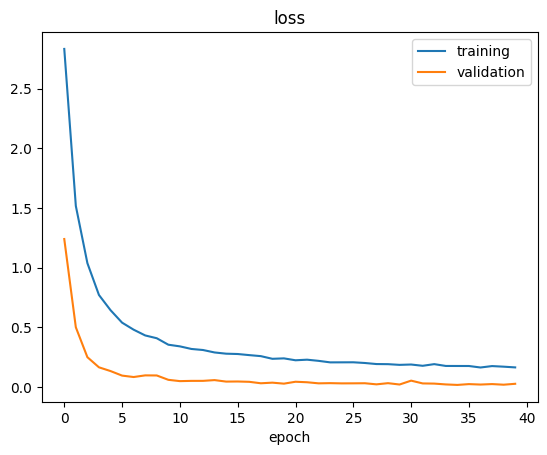

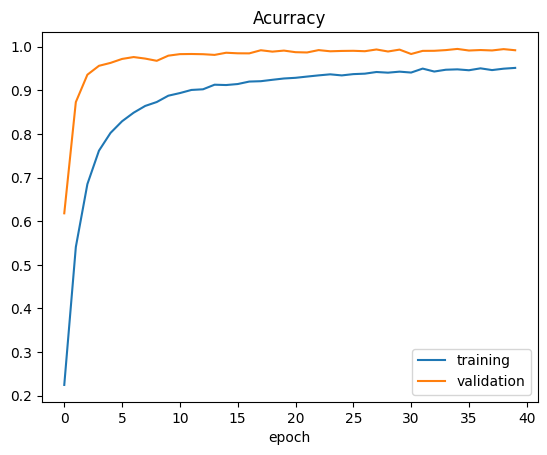

In [18]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [19]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.0307119470089674
Test Accuracy: 0.9901810884475708


In [20]:
model.save('traffif_sign_model.h5')

C:\Users\VENKATESH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


246/246 [==============================] - 11s 44ms/step


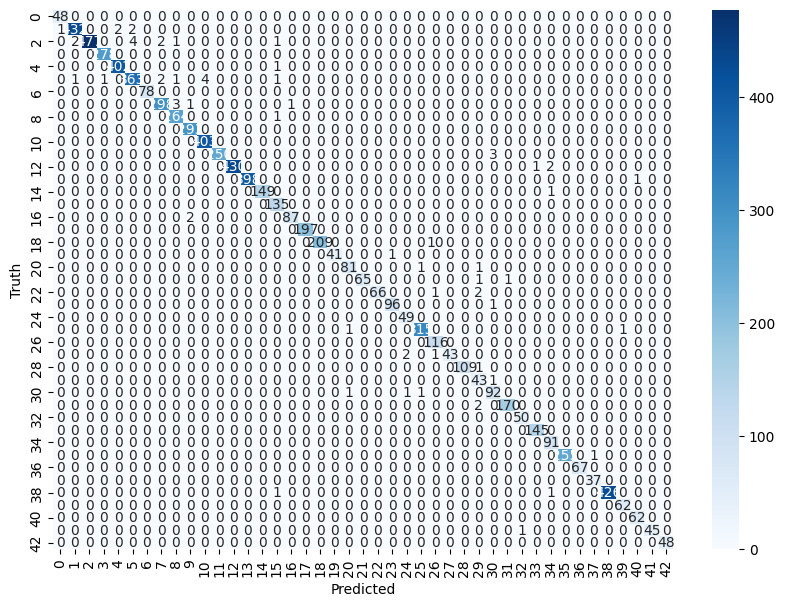

In [21]:
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import seaborn as sn
model=keras.models.load_model('traffif_sign_model.h5')      # load model from directory
#####Confusion matrix code####
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm=confusion_matrix(Y_tests,y_pred)     # confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusionmatrix.png', dpi=300, bbox_inches='tight')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolution import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'keras.layers.convolution'

In [7]:
path = "myData" # folder with all the class folders
labelFile = 'labels.csv' # file with all names of classes
batch_size_val=50  # how many to process together
steps_per_epoch_val=502
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for

In [8]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [9]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


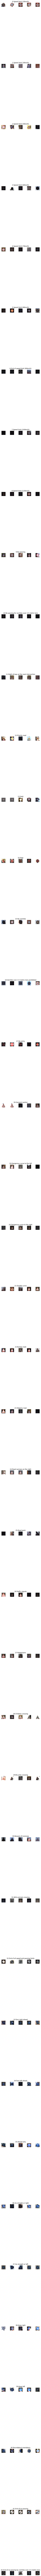

In [10]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[126, 1273, 1269, 800, 1166, 1055, 236, 824, 822, 856, 1165, 737, 1209, 1221, 421, 337, 231, 658, 690, 111, 186, 153, 215, 282, 154, 907, 348, 139, 314, 162, 251, 434, 137, 385, 230, 658, 206, 114, 1169, 174, 182, 128, 136]


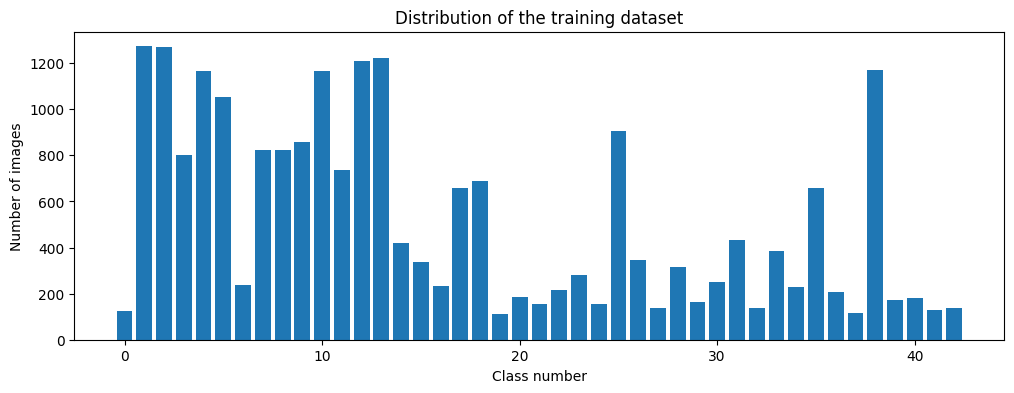

In [11]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [13]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow(X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x73cf019b::Set<1,-1,-1>,struct cv::impl::A0x73cf019b::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
